In [18]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

print(tf.__version__)


1.10.0


In [30]:
#print(x_train[0])

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
print(y_train[0])
print(y_test[0])

5
7


In [10]:
#print(x_train[0])

In [19]:
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

In [20]:
#print(x_train[0])

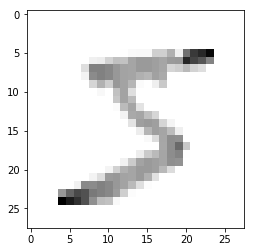

In [14]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

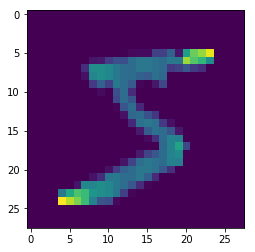

In [15]:
plt.imshow(x_train[0])
plt.show()

In [21]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [31]:
model.fit(x_train, y_train, epochs=10)  # train the model


Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2593 - acc: 0.9226
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1064 - acc: 0.9668
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0729 - acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0534 - acc: 0.9832
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0414 - acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0331 - acc: 0.9891: 0s - loss: 0.0326 - acc: 0.
Epoch 7/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0252 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0218 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0179 - acc: 0.9940
Epoch 10/10
60000/60000 [==============================] - 3s 54us/step

In [32]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 0s 19us/step
0.11254503933624073
0.9746


In [33]:
model.save('epic_num_reader.model') # save model


In [34]:
new_model = tf.keras.models.load_model('epic_num_reader.model') # load model


In [35]:
#finally, make predictions!

predictions = new_model.predict(x_test)
print(predictions)

[[2.7951902e-16 1.3584186e-13 1.2664395e-12 ... 1.0000000e+00
  9.9881384e-17 8.6101707e-12]
 [5.7030948e-22 3.9056137e-12 1.0000000e+00 ... 3.6691502e-17
  1.3364695e-15 3.6251675e-27]
 [1.9117125e-14 9.9999249e-01 1.1878775e-07 ... 7.0106171e-06
  3.4101507e-07 5.0808416e-15]
 ...
 [2.5265885e-12 5.2378402e-10 3.4496695e-13 ... 1.2671840e-08
  4.3858406e-09 2.2752586e-08]
 [3.2258867e-14 2.2810815e-15 1.7716557e-15 ... 2.2217579e-13
  6.5449775e-08 3.7727202e-16]
 [4.6051048e-13 5.6859511e-16 2.1627404e-14 ... 4.1990517e-18
  6.8668925e-12 5.3367548e-15]]


In [36]:
import numpy as np

print(np.argmax(predictions[0]))

7


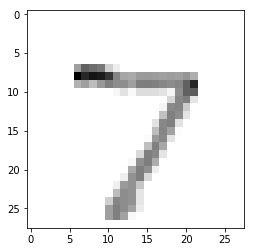

In [37]:
#There's your prediction, let's look at the input:

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

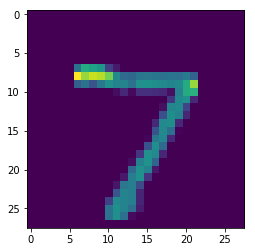

In [38]:
plt.imshow(x_test[0])
plt.show()